In [3]:
import pandas as pd  # Import the pandas library and assign it to the alias 'pd'
df = pd.read_csv('/content/bbc-news-data.csv', delimiter='\t')
print(df.head())

   category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...  


In [4]:
df.drop(columns=['filename'], inplace=True)


In [5]:
print(df.isnull().sum())  # Check missing values


category    0
title       0
content     0
dtype: int64


In [6]:
df['content'] = df['content'].str.lower()


In [7]:
import re

df['content'] = df['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [11]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')  # For WordNet Lemmatizer
nltk.download('wordnet')  # Ensure wordnet is downloaded


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
import os
import nltk

nltk_data_path = "/root/nltk_data"
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

nltk.data.path.append(nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # Ensure tokenizer is also available


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords to the default NLTK data directory if not already present
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['content'] = df['content'].apply(lambda x: ' '.join([word for word in word_tokenize(str(x)) if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['content'])  # Convert text to BoW matrix
print(X_bow.shape)  # Check the size of the resulting matrix


(2225, 33892)


In [ ]:
# Q1

# Q1

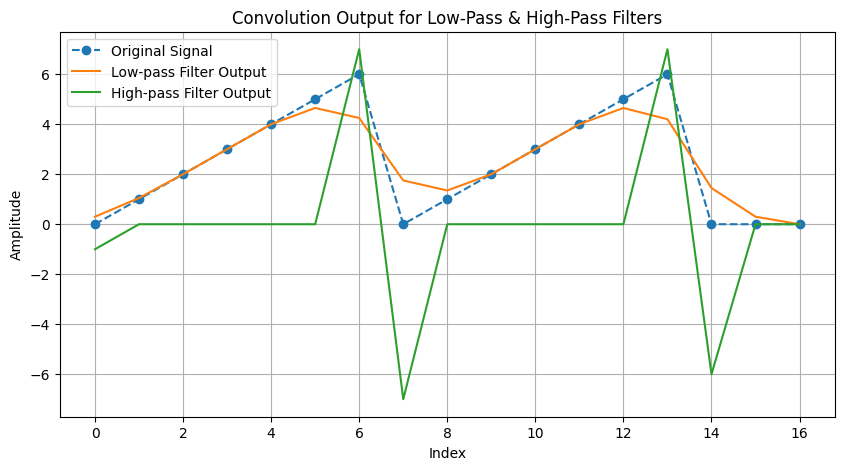

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signal
X = [0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,0,0]

# Define filters
H_L = [0.05, 0.2, 0.5, 0.2, 0.05]  # Low-pass filter (smoothing)
H_H = [-1, 2, -1]  # High-pass filter (edge detection)

# Perform convolution
y_low = np.convolve(X, H_L, mode='same')  # Smoothing (Low-pass filter)
y_high = np.convolve(X, H_H, mode='same')  # Edge detection (High-pass filter)

# Plot results
plt.figure(figsize=(10, 5))

plt.plot(X, label='Original Signal', linestyle='dashed', marker='o')
plt.plot(y_low, label='Low-pass Filter Output', linestyle='solid')
plt.plot(y_high, label='High-pass Filter Output', linestyle='solid')

plt.legend()
plt.title("Convolution Output for Low-Pass & High-Pass Filters")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


# Q2

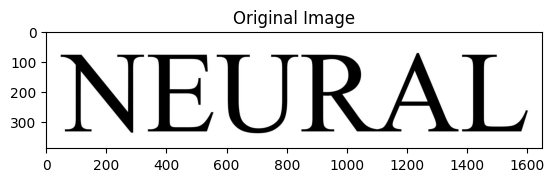

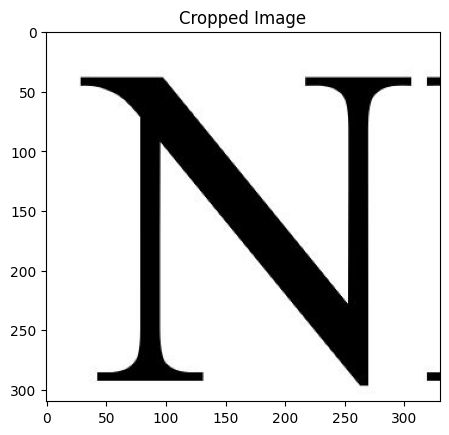

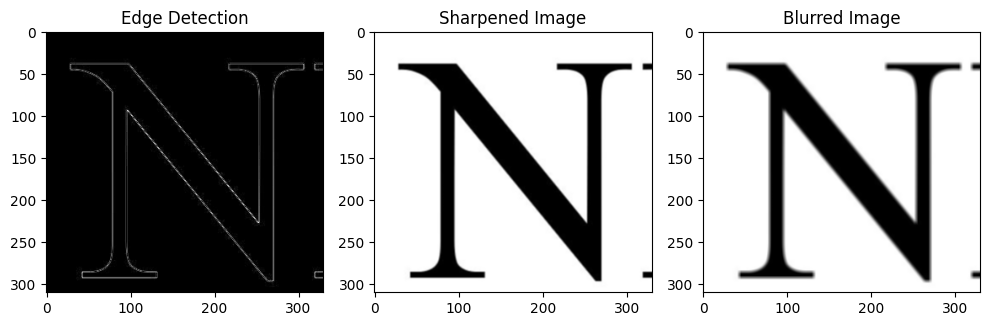

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

# Load image
img_path = "/content/Neural.JPG"  # Update this if necessary
im = imread(img_path)

# Convert to grayscale
img = rgb2gray(im) * 255  # Normalize to 0-255
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()

# Crop a region of interest
img1 = img[40:350, 20:350]
plt.imshow(img1, cmap='gray')
plt.title("Cropped Image")
plt.show()

# Define filters
fil1 = np.array([[ 0, -1, 0],
                 [-1, 4, -1],
                 [ 0, -1, 0]])  # Edge detection filter

fil2 = np.array([[ 0.2, 0.5, 0.2],
                 [ 0.5, 1, 0.5],
                 [ 0.2, 0.5, 0.2]])  # Sharpening filter

fil3 = np.ones((5, 5)) / 25  # Smoothing (Blurring) filter

# Apply convolutions
grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

# Display results
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(abs(grad1), cmap='gray')
plt.title("Edge Detection")

plt.subplot(1, 3, 2)
plt.imshow(grad2, cmap='gray')
plt.title("Sharpened Image")

plt.subplot(1, 3, 3)
plt.imshow(grad3, cmap='gray')
plt.title("Blurred Image")

plt.tight_layout()
plt.show()


# Q3

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Load and preprocess data
df = pd.read_csv('/content/bbc-news-data.csv', delimiter='\t')

# Encode category labels into numerical values
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Convert text into BoW feature vectors
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['content'])

# Convert to NumPy arrays
X = X_bow.toarray()  # Convert sparse matrix to dense
y = df['category_encoded'].values

# 2️⃣ Split data into training & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Define a Fully Connected Neural Network
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4️⃣ Train the network
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# 5️⃣ Evaluate model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")

# 6️⃣ Save model
model.save('/content/text_classification_model.h5')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 393ms/step - accuracy: 0.7019 - loss: 0.8336 - val_accuracy: 0.9326 - val_loss: 0.2217
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 328ms/step - accuracy: 0.9922 - loss: 0.0377 - val_accuracy: 0.9596 - val_loss: 0.1228
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 323ms/step - accuracy: 0.9966 - loss: 0.0167 - val_accuracy: 0.9618 - val_loss: 0.1856
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.9986 - loss: 0.0081 - val_accuracy: 0.8921 - val_loss: 1.0350
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.9782 - loss: 0.1331 - val_accuracy: 0.9461 - val_loss: 0.2314
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 362ms/step - accuracy: 0.9976 - loss: 0.0092 - val_accuracy: 0.9393 - val_loss: 0.3574
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 326ms/step - accuracy: 0.9985 - loss: 0.0058 - val_accuracy: 0.9371 - val_loss: 0.6030
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.9856 - loss: 0.0833 - val_accu

Validation Accuracy: 0.9551


# A4

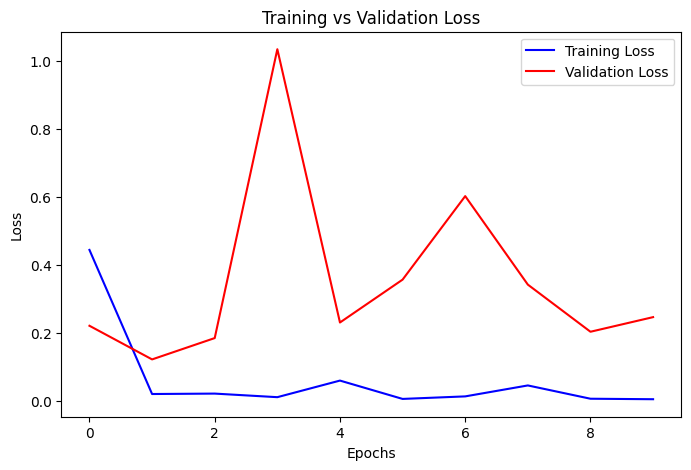

In [14]:
import matplotlib.pyplot as plt

# Plot Training Loss vs. Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


# A5

In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute Accuracy
test_accuracy = accuracy_score(y_val, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_classes, target_names=label_encoder.classes_))


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Test Accuracy: 0.9551

Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.95      0.96       115
entertainment       0.96      0.90      0.93        72
     politics       0.92      0.95      0.94        76
        sport       0.96      0.99      0.98       102
         tech       0.95      0.97      0.96        80

     accuracy                           0.96       445
    macro avg       0.95      0.95      0.95       445
 weighted avg       0.96      0.96      0.95       445

